In [1]:
%%capture
%run ./5_average_size_&_number_tree.ipynb

### Top 10: Trees most frequent in Paris

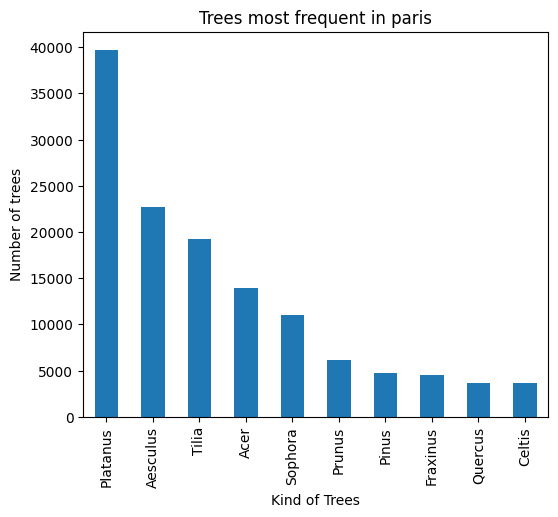

In [13]:
trees_most_frequent_in_paris = df.genre.value_counts().nlargest(10)
trees_most_frequent_in_paris.plot(kind='bar', title='Trees most frequent in paris', ylabel='Number of trees',
         xlabel='Kind of Trees', figsize=(6, 5));

We can see the tree the most present in Paris is the platane tree

### The 10 categories of tallest trees

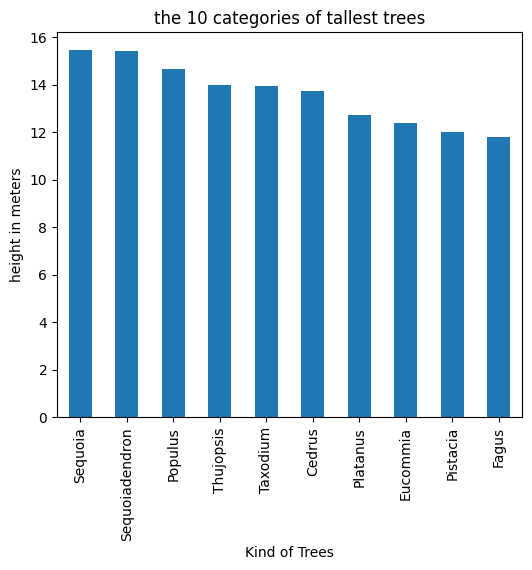

In [15]:
df_tree_height_mean_kind = df.groupby(['genre'])['hauteur_m'].mean()
df_tree_height_mean_kind = df_tree_height_mean_kind.sort_values(ascending=False)[:10]
df_tree_height_mean_kind.plot(kind='bar', title='the 10 categories of tallest trees', ylabel='height in meters',
         xlabel='Kind of Trees', figsize=(6, 5));

We can see The Sequoia is the tallest tree in paris

### Trees the most frequent in Paris grouped by district

In [5]:
tree_most_present_by_dist = df.groupby(['arrondissement', 'genre'])['id'].count()
new_df=tree_most_present_by_dist.reset_index()
idx = new_df.groupby(['arrondissement'])['id'].transform(max) == new_df['id']
new_df = new_df[idx]
new_df.rename(columns = {'id':'number'}, inplace = True)
new_df["district_genre"] = '[' + new_df["arrondissement"] + ']' + ' - ' + new_df["genre"]
new_df = new_df.sort_values('number', ascending=False)
new_df[:10]

,arrondissement,genre,number,district_genre
1510,PARIS 7E ARRDT,Platanus,4110,[PARIS 7E ARRDT] - Platanus
727,PARIS 16E ARRDT,Platanus,4007,[PARIS 16E ARRDT] - Platanus
1542,PARIS 8E ARRDT,Aesculus,3821,[PARIS 8E ARRDT] - Aesculus
327,PARIS 12E ARRDT,Platanus,3787,[PARIS 12E ARRDT] - Platanus
828,PARIS 17E ARRDT,Platanus,3113,[PARIS 17E ARRDT] - Platanus
1019,PARIS 19E ARRDT,Platanus,2826,[PARIS 19E ARRDT] - Platanus
521,PARIS 14E ARRDT,Platanus,2614,[PARIS 14E ARRDT] - Platanus
422,PARIS 13E ARRDT,Platanus,2468,[PARIS 13E ARRDT] - Platanus
636,PARIS 15E ARRDT,Tilia,2202,[PARIS 15E ARRDT] - Tilia
1092,PARIS 20E ARRDT,Acer,2135,[PARIS 20E ARRDT] - Acer


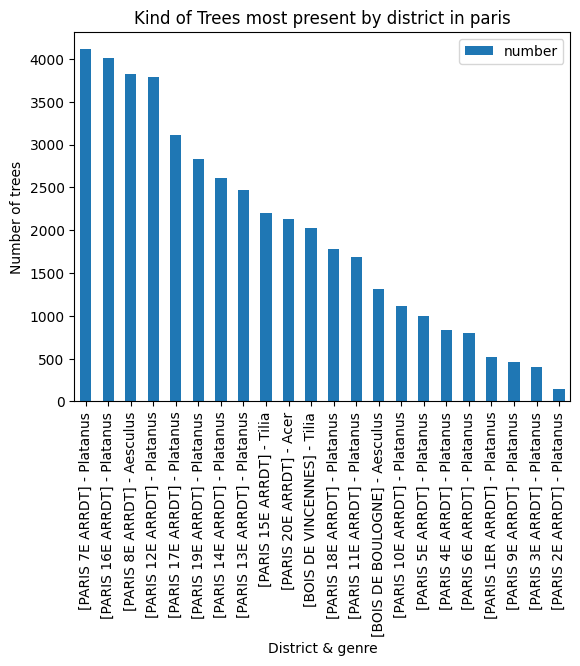

In [6]:
new_df.plot.bar(x='district_genre', y="number", title='Kind of Trees most present by district in paris', xlabel='District & genre', ylabel='Number of trees');

We can see the kind of tree the most present for each district in Paris is the Platane